In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [6]:
observations = 1000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

In [7]:
noise = np.random.uniform(-1,1, (observations,1))

In [8]:
generated_targets = 2*xs -3*zs +5 +noise

In [10]:
np.savez('tf_info', inputs = generated_inputs, targets = generated_targets )

In [13]:
training_data = np.load('tf_info.npz')

In [19]:
inputs_size = 2
outputs_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(outputs_size,
                                                  kernel_initializer=tf.random_uniform_initializer(minval = -0.1, maxval=0.1),
                                                  bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                                  )
                            ])

custome_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


model.compile(optimizer = custome_optimizer, loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 57.2853 - 844ms/epoch - 26ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1447 - 43ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4221 - 48ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3457 - 44ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4475 - 43ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3817 - 44ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3711 - 47ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3820 - 46ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3716 - 43ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3970 - 46ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3541 - 44ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3701 - 49ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3605 - 45ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3549 - 52ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3474 - 44ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3784 - 41ms/epoch - 1ms/ste

In [20]:
model.layers[0].get_weights()

[array([[ 2.0506957],
        [-2.9833665]], dtype=float32),
 array([5.0056877], dtype=float32)]

In [24]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [26]:
print(weights, bias)

[[ 2.0506957]
 [-2.9833665]] [5.0056877]


In [30]:
predited_targets = model.predict_on_batch(training_data['inputs']).round(1)

In [31]:
predited_targets

array([[ 12.1],
       [ 14.7],
       [  0.5],
       [ -4.6],
       [ 25.3],
       [  0.3],
       [ 20.5],
       [ -3. ],
       [  8.2],
       [  6.5],
       [ 15.5],
       [ -3.8],
       [ 50.1],
       [-37.9],
       [  0.3],
       [  2.7],
       [-42.6],
       [ 24.5],
       [  8.1],
       [-24.7],
       [-26.5],
       [  8. ],
       [ 14. ],
       [-20.7],
       [  6.9],
       [-38.7],
       [ 22.6],
       [  9.2],
       [  7.2],
       [ -2.8],
       [ 41.5],
       [ -7.4],
       [  6. ],
       [ 24. ],
       [  6.5],
       [-29.4],
       [-31.3],
       [ 17. ],
       [-27. ],
       [ 30.4],
       [ 13.2],
       [  9.9],
       [-28.7],
       [ 17.4],
       [ 47.3],
       [  0.3],
       [  9.9],
       [ -2.9],
       [ 33. ],
       [ -0.7],
       [ 22.2],
       [ 24.4],
       [  8.5],
       [ 11.1],
       [  1.1],
       [ 20. ],
       [ 29.7],
       [  7.7],
       [ 29.5],
       [ -3.5],
       [ -8.7],
       [ 51.4],
       [

In [29]:
training_data['targets'].round(1)

array([[ 11.5],
       [ 15. ],
       [  0.9],
       [ -5.8],
       [ 26. ],
       [  1. ],
       [ 20.6],
       [ -2.1],
       [  8.3],
       [  6.7],
       [ 15.4],
       [ -4.2],
       [ 48.9],
       [-37.7],
       [ -0.3],
       [  3.2],
       [-41.8],
       [ 23.9],
       [  8.5],
       [-25.2],
       [-26.5],
       [  7.7],
       [ 13.7],
       [-20. ],
       [  6.7],
       [-37.6],
       [ 22.8],
       [  8.5],
       [  6.3],
       [ -3.7],
       [ 41.6],
       [ -7.3],
       [  5.4],
       [ 23.6],
       [  5.7],
       [-28.1],
       [-30.2],
       [ 17.5],
       [-27.1],
       [ 30. ],
       [ 13. ],
       [ 10.6],
       [-28.9],
       [ 16.8],
       [ 47.8],
       [ -0.4],
       [  8.8],
       [ -4.2],
       [ 32. ],
       [ -0.2],
       [ 22.9],
       [ 25.1],
       [  9.4],
       [ 11.2],
       [  1.3],
       [ 20.4],
       [ 29.2],
       [  7. ],
       [ 28.4],
       [ -3.1],
       [ -9. ],
       [ 51. ],
       [

In [32]:
import matplotlib.pyplot as plt

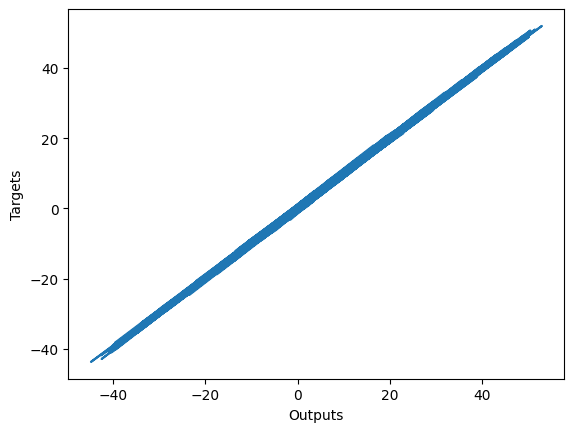

In [33]:
plt.plot(predited_targets, training_data['targets'])
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()